## **Working with Geospatial Data – Session 2**  

In this session, we will work with **GeoPandas** and **Pandas** to manipulate and analyze geospatial data. The focus is on transforming a standard DataFrame into a **GeoDataFrame**, which enables spatial operations.


### **1. Importing Required Libraries**  
Before working with geospatial data, we need to import the necessary libraries:

In [1]:
import pandas as pd
import geopandas as gpd

### **2. Creating a Data Dictionary**
We define a dictionary containing information about major cities around the world.

In [2]:
data = {
    "Name": ["New York City", "São Paulo", "Tokyo", "Lagos", "Sydney"],
    "Population": [8419600, 12325232, 13929286, 15000000, 5312163],  # Approximate populations
    "Latitude": [40.7128, -23.5505, 35.6895, 6.5244, -33.8688],
    "Longitude": [-74.0060, -46.6333, 139.6917, 3.3792, 151.2093]
}

### **3. Creating a Pandas DataFrame**
We convert the dictionary into a Pandas DataFrame.

In [3]:
cities_df = pd.DataFrame(data)

### **4. Converting a DataFrame into a GeoDataFrame**
To work with geospatial operations, we need to convert the DataFrame into a GeoDataFrame by creating a geometry column.

* gpd.points_from_xy(): Converts longitude and latitude into Point geometries.
* geometry column: A special column that stores geographic features (points, lines, polygons).

In [4]:
gdf = gpd.GeoDataFrame(cities_df, geometry=gpd.points_from_xy(cities_df["Longitude"], cities_df["Latitude"]))

### **5. Installing and Using Matplotlib**
To improve our plots, we install Matplotlib, which is a powerful plotting library.

In [5]:
%pip install matplotlib -q


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### **6. Plotting the Cities on a Map**
We can visualize the cities using GeoPandas' built-in .plot() function.

<Axes: >

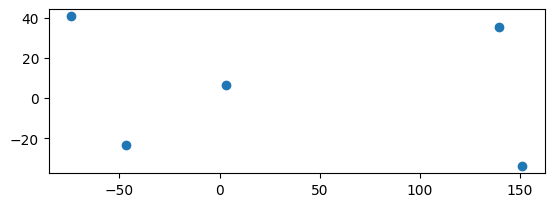

In [6]:
## Creates a visualization of the data
gdf.plot()

In [7]:
import matplotlib.pyplot as plt

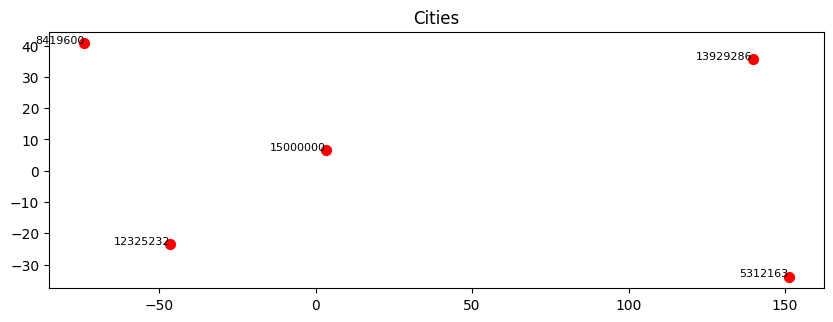

In [8]:
## Creates a figure and axis for plotting.
fig, ax = plt.subplots(figsize=(10, 10))

## Plots the cities as red dots.
gdf.plot(ax=ax, marker="o", color="red", markersize=50)
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["Population"]):
    ## Adds text labels for city populations.
    ax.text(x, y, label, fontsize=8, color="black", ha="right")

plt.title("Cities")
plt.show()

### **7. Installing Folium and Mapclassify for Interactive Maps**
For interactive maps, we use Folium, which is based on Leaflet.js.

In [9]:
pip install folium mapclassify -q


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
gdf.explore()

In [11]:
gdf = gdf.set_crs('EPSG:4326')

### **8. Coordinate Reference Systems (CRS)**
A Coordinate Reference System (CRS) defines how geographic coordinates map to the Earth's surface.

To check the CRS:

In [12]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
gdf.explore()

## **9. Interactive Mapping with Leafmap**  
### **What is Leafmap?**  
**Leafmap** is a Python package built on top of **Folium** and **IPyLeaflet** that makes it easier to create interactive maps. It provides additional functionalities like:
- **Integrating basemaps** from different providers (Google Maps, OpenStreetMap, ESRI, etc.).
- **Adding vector and raster layers** from GeoJSON, Shapefiles, and cloud services.
- **Performing spatial analysis** directly within Jupyter Notebooks.
- **Exporting maps** to HTML and sharing them online.

Before using **Leafmap**, we need to install it:

In [14]:
pip install leafmap -q


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install -U ipywidgets -q


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import leafmap 

In [17]:
m = leafmap.Map(center=[0,0], zoom=2)

In [18]:
m

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [19]:
m.add_gdf(gdf, layer_name="Points")

A **basemap** is the background layer of a map that provides geographic context for overlaying other spatial data. **Leafmap** allows users to switch between multiple basemaps dynamically, making it easier to visualize data with different perspectives.


In [20]:
m.add_basemap("Esri.WorldImagery") # Satellite imagery
m.add_basemap("OpenStreetMap") # OpenStreetMap layer

OpenStreetMap has been already added before.


In [21]:
gdf.head()

,Name,Population,Latitude,Longitude,geometry
0,New York City,8419600,40.7128,-74.0060,POINT (-74.006 40.7128)
1,São Paulo,12325232,-23.5505,-46.6333,POINT (-46.6333 -23.5505)
2,Tokyo,13929286,35.6895,139.6917,POINT (139.6917 35.6895)
3,Lagos,15000000,6.5244,3.3792,POINT (3.3792 6.5244)
4,Sydney,5312163,-33.8688,151.2093,POINT (151.2093 -33.8688)


### **11. Installing Required Libraries for Advanced Visualization**
We install the necessary geospatial visualization and color-mapping libraries.

In [22]:
pip install lonboard palettable sidecar -q


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
from pathlib import Path

import geopandas as gpd
import pandas as pd
import shapely

from palettable.colorbrewer.diverging import BrBG_10
from sidecar import Sidecar

from lonboard import Map, ScatterplotLayer
from lonboard.colormap import apply_continuous_cmap

In [24]:
url = "https://ookla-open-data.s3.us-west-2.amazonaws.com/parquet/performance/type=mobile/year=2019/quarter=1/2019-01-01_performance_mobile_tiles.parquet"

In [25]:
%pip install pyarrow
%pip install fastparquet


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### **12. Loading and Processing the Parquet File**
We first check if the file exists locally, and if not, we download and process it.

In [26]:
local_path = Path("internet-speeds.parquet")

if local_path.exists():
    gdf = gpd.read_parquet(local_path)
else:
    columns = ["avg_d_kbps", "tile"]
    df = pd.read_parquet(url, columns=columns)

    tile_geometries = shapely.from_wkt(df["tile"])
    tile_centroids = shapely.centroid(tile_geometries)

    gdf = gpd.GeoDataFrame(df[["avg_d_kbps"]], geometry=tile_centroids, crs="EPSG:4326")
    gdf.to_parquet(local_path)

In [27]:
gdf.head()

,avg_d_kbps,geometry
0,5983,POINT (-160.01862 70.63722)
1,3748,POINT (-160.04059 70.63357)
2,3364,POINT (-160.04059 70.63175)
3,2381,POINT (-160.0351 70.63357)
4,3047,POINT (-160.0351 70.63175)


### **13. Creating an Interactive Map with Lonboard**
We use Sidecar to integrate an interactive Lonboard map.

In [28]:
sidecar = Sidecar()

Now, we create a Scatterplot layer from our GeoDataFrame.

In [29]:
layer = ScatterplotLayer.from_geopandas(gdf)
m = Map(layer, _height=800)

In [30]:
m

Map(custom_attribution='', layers=(ScatterplotLayer(table=arro3.core.Table
-----------
avg_d_kbps: UInt32
geom…